<a href="https://colab.research.google.com/github/yf257/tensorflow-deep-learning/blob/main/time_series_modeling_of_Bitcoin_prices_w_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time_series_modeling_of_Bitcoin_prices_w_Tensorflow



In [2]:
## Get data
# 
! wget https://github.com/yf257/tensorflow-deep-learning/raw/main/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv

--2022-02-06 14:41:41--  https://github.com/yf257/tensorflow-deep-learning/raw/main/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yf257/tensorflow-deep-learning/main/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv [following]
--2022-02-06 14:41:41--  https://raw.githubusercontent.com/yf257/tensorflow-deep-learning/main/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158124 (154K) [text/plain]
Saving to: ‘BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv.1’

BTC_USD_2014-11-03_ 100%[===================>] 154.42K  --.-KB/s

## Importing time series with pandas

In [3]:
# Import with pandas
import pandas as pd
 # Let's read in our bitcoin data and prase the dataset

df  = pd.read_csv("/content/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv",parse_dates = ["Date"],index_col= ["Date"])# prase the date column as date time
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-03,BTC,324.467934,323.826186,333.539527,323.106623
2014-11-04,BTC,328.644408,324.424164,330.671610,320.902900
2014-11-05,BTC,337.921358,328.653046,342.384170,328.597125
2014-11-06,BTC,348.992860,337.921358,352.585895,336.236830
2014-11-07,BTC,341.459753,348.992860,351.651854,340.196145


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2652 entries, 2014-11-03 to 2022-02-05
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2652 non-null   object 
 1   Closing Price (USD)  2652 non-null   float64
 2   24h Open (USD)       2652 non-null   float64
 3   24h High (USD)       2652 non-null   float64
 4   24h Low (USD)        2652 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB


In [17]:
# how many sample
len(df)

2652

The data file contains the historical price of bitcoin for the past 8 years but there's 2652 samples.

 Typically deep learning models usually like lost of sample. However, a smaller number of samples is something is usually seen in time series problems

 ** note** the **Seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because one sample per day meaning 365 sample per year.

In [21]:
# select the colom:
#only want closing price
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2014-11-03,324.467934
2014-11-04,328.644408
2014-11-05,337.921358
2014-11-06,348.992860
2014-11-07,341.459753


###Visualize the bitcoin history 

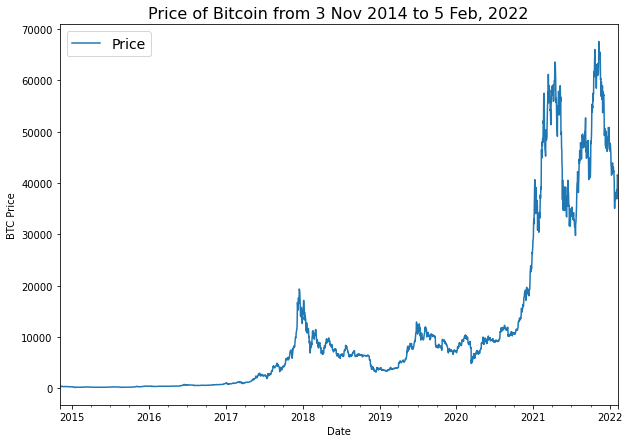

In [24]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 3 Nov 2014 to 5 Feb, 2022",fontsize = 16)
plt.legend(fontsize = 14)


## Importing time series data with python's CSV module


In [27]:
# Importing and formatting historical Bitcoin data with Python

import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2014-11-03_2022-02-05-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)# skip header line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))# get the dates as date not string
    btc_price.append(float(line[2]))# get the closing price as float

timesteps[:10],btc_price[:10]

([datetime.datetime(2014, 11, 3, 0, 0),
  datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0)],
 [324.467934,
  328.644408,
  337.921358,
  348.99286,
  341.459753,
  344.745289,
  357.239982,
  371.116917,
  366.664633,
  428.882925])

Text(0.5, 1.0, 'Price of Bitcoin from 3 Nov 2014 to 5 Feb, 2022')

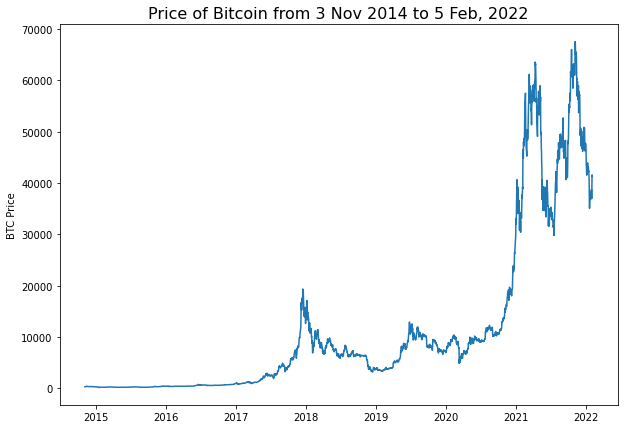

In [28]:
import numpy as np

plt.figure(figsize = (10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 3 Nov 2014 to 5 Feb, 2022",fontsize = 16)

## Create train and test sets of our time series data

### Creating train and test sets with time series in the wrong way

In [29]:
bitcoin_prices.head()

,Price
Date,
2014-11-03,324.467934
2014-11-04,328.644408
2014-11-05,337.921358
2014-11-06,348.992860
2014-11-07,341.459753


In [36]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2014-11-03T00:00:00.000000000', '2014-11-04T00:00:00.000000000',
        '2014-11-05T00:00:00.000000000', '2014-11-06T00:00:00.000000000',
        '2014-11-07T00:00:00.000000000', '2014-11-08T00:00:00.000000000',
        '2014-11-09T00:00:00.000000000', '2014-11-10T00:00:00.000000000',
        '2014-11-11T00:00:00.000000000', '2014-11-12T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([324.467934, 328.644408, 337.921358, 348.99286 , 341.459753,
        344.745289, 357.239982, 371.116917, 366.664633, 428.882925]))

### samples in time serie study can't be taken in random order

In [38]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(timesteps,
                                                  prices,
                                                  test_size = 0.2,
                                                  random_state = 42)
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((2121,), (531,), (2121,), (531,))

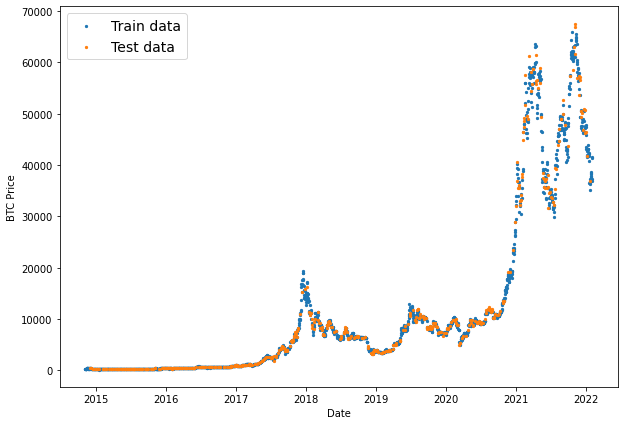

In [39]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train,s = 5, label = "Train data")
plt.scatter(X_test,y_test,s = 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

### Creat train & test sets for time series (the right way, following time order)

In [42]:
# Create train and test splits the right way

split_size = int(0.8*len(prices))
#create train data splits(everything before the split)
X_train,y_train = timesteps[:split_size],prices[:split_size]
X_test,y_test = timesteps[split_size:],prices[split_size:]

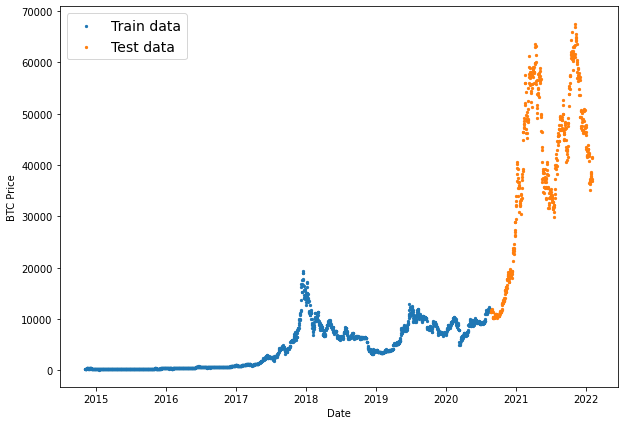

In [43]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train,s = 5, label = "Train data")
plt.scatter(X_test,y_test,s = 5, label = "Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize = 14)
plt.show()

## Create a plotting function

In [45]:
# Create a function to plot time series data

def plot_time_series(timesteps, values,format=".",start = 0, end = None,label = None):
  """
  Plots timestpes against values

  parameters
  -----
  timesteps: array of timestep value
  values : array of values across time
  format :style of plot, default "."
  start : where plot start
  end : where plot end
  """
  plt.plot(timesteps[start:end],values[start:end],format,label = label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)



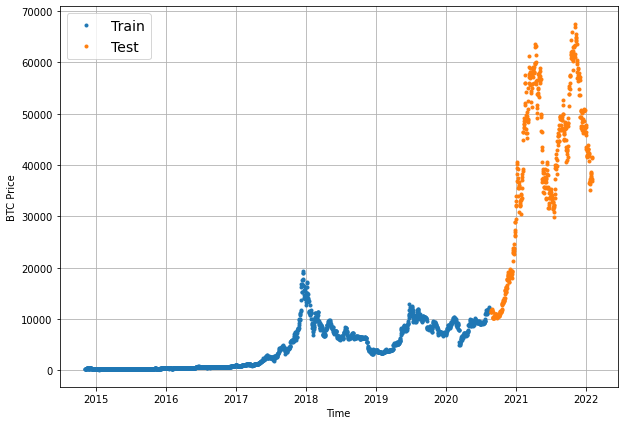

In [46]:
# Test out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values = y_train,label = "Train")
plot_time_series(timesteps=X_test,values = y_test,label = "Test")

## Modelling Experiments

Model 0 Naive forecast (baseline): Naïve forecasting is the technique in which the last period's sales are used for the next period's forecast without predictions or adjusting the factors.

Model 1 Dense model(window = 7, horizon = 1): Deep learning sequential model with one hidden layer.

Model 2 Dense model(window size = 30, horizon = 1): Deep learning sequential model with one hidden layer.




## Model 0 : Naive forecast(baseline)

The formula 

$$ \hat{y}_{t} = y_{t-1}$$

prediction at t is the same as in t-1

In [47]:
# Create a naive forcast

naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([11759.941293, 11328.768901, 11464.042672, 11327.9     ,
        11531.95454 , 11476.629603, 11714.23514 , 11656.432744,
        11923.96    , 11396.857033]),
 array([36827.674589, 37197.821249, 37748.36    , 38176.097725,
        37928.575488, 38499.876388, 38722.518519, 36923.5     ,
        37303.9     , 41586.856262]))

### visualize the naive forcast model

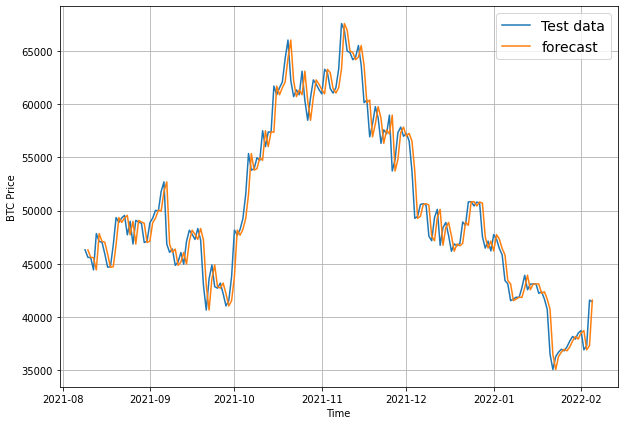

In [48]:
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train,values = y_train,label = "Train")
plot_time_series(timesteps = X_test, values = y_test,format = "-",start = 350,label = "Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format = "-",start = 350, label = "forecast")

## Evaluating a time series model

Some evaluation metrics for time series forecasting:

Because we're working on a regression problem, we'll need some regression-like metrics.

* MAE(Mean absolute error):
* MSE(Mean squared error):
* RMSE(Root-mean-square deviation):
* MAPE(Mean absolute percentage error):
* MASE(Mean absolute scaled error):

We want to compare different between prediction and the actual number.

In [49]:
import tensorflow as tf


In [50]:
# MASE implementation:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))  # Our seasonal 
  return mae/mae_naive_no_season

In [51]:
mean_absolute_scaled_error(y_test[1:],y_pred = naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9988281049018259>

In [52]:
# Create a function to take in model predictions and truth values and return evaluation 

def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [53]:

naive_results = evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 1136.6378,
 'mape': 2.840237,
 'mase': 0.998828,
 'mse': 2740233.8,
 'rmse': 1655.3651}

## Format Data : Windowing our dataset

why window?
We turn the time series problem to a supervised learning problem. Using a history of the length of the window as the data and predict the "future".  

Windowing for one week 
[0,1,2,3,4,5,6]->[7]



In [54]:
len(y_train)

2121

In [55]:
## What we want to achieve
btc_price[:7],btc_price[7]

([324.467934,
  328.644408,
  337.921358,
  348.99286,
  341.459753,
  344.745289,
  357.239982],
 371.116917)

In [56]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # next one day
WINDOW_SIZE = 7 # Use 7 days of data

In [61]:
# Create function to label windowed data
def get_labelled_window(x,horizon = HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input:[0,1,2,3,4,5,6,7]-> Output: ([0,1,2,3,4,5,6]),[7])
  """
  return x[:,:-horizon],x[:,-horizon:]

In [62]:

tf.expand_dims(tf.range(8)+1,axis = 0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [65]:
# Creating testing set

test_window,test_label = get_labelled_window(tf.expand_dims(tf.range(8),axis = 0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

We've got a way to label our windowed data.
However, this only works on a small scale.
we need a way to do the above across the whole time series

our function will:
1. Create a window step of specific window size ([0,1,2,3,4])
2. Use Numpy indexing to create a 2D array of multiple window steps 

[0,1,2,3,4,5,6],
3. uses the 2D array of multiple window steps to index on a target series

In [66]:
import numpy as np

# Create function to view NUmpy arrays as windows
def make_windows(x,window_size = WINDOW_SIZE, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequantial labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling)
  window_step = np.expand_dims(np.arange(window_size + horizon),axis = 0 )
  # 2. Create a 2D array of multiple window steps
  window_indexes = window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon -1)),axis = 0).T# window_step + 
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(f"Window indexes:\n{window_step,window_indexes.shape}")
  #4. Get the labelled windows
  windows,labels = get_labelled_window(windowed_array,horizon = horizon)
  return windows, labels

In [67]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW_SIZE,horizon=HORIZON)

len(full_windows),len(full_labels)

(2645, 2645)

In [68]:
for i in range(3):
  print(f"Window: {full_windows[i]}->Lable{full_labels[i]}")

Window: [324.467934 328.644408 337.921358 348.99286  341.459753 344.745289
 357.239982]->Lable[371.116917]
Window: [328.644408 337.921358 348.99286  341.459753 344.745289 357.239982
 371.116917]->Lable[366.664633]
Window: [337.921358 348.99286  341.459753 344.745289 357.239982 371.116917
 366.664633]->Lable[428.882925]


### Turning the full windowed data and split them into training and test *set*


In [69]:
# Makethetrain/testsplits
def make_train_test_splits(windows,labels,test_split = 0.2):
  """
  splits matching pairs of windows and lablesinto train and test split
  """
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_window = windows[split_size:]
  test_label = labels[split_size:]
  return train_windows,test_window,train_labels,test_label

In [70]:
train_windows, test_windows, train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples

More specifically, we want to compare each of our model's best performances against the other model's best performances.

In [71]:
import os 

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path = "model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),verbose = 0, # only output a limited amount of test
                                            save_best_only = True,
                                            monitor = "val_loss")

## Model 1: Dense model (window = 7, horizon = 1)

our first deep model is going to be a simple dense model:

* a single dense layer with 128 hidden units and a ReLU
* An output layer with linear activation (no activation )
* Adam optimization and MAE loss function 
* Batch size of 128(previously we've use 32)
* 100 epochs

WHY these VALUES>

from experiment

* Hyperparameters * = Values a machine learning practitioner can adjust 
* **Parameters** = values the model learn

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(HORIZON,activation = "linear"),

],name = "model_1_dense")
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_1.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 59ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 43ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 41ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 41ms/step - loss: 158.5

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# load in the saved best performing model_1 and evaluate it on the test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecast (on the test dataset)

To make" forecast" on the test dataset

1. Take in a train model
2. Take in some input data 
3. pass the input data to the model's predict
4. Returns the predictions

In [ ]:
def make_preds(model,input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
#Make prediction 
model_1_preds = make_preds(model_1,test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
       8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

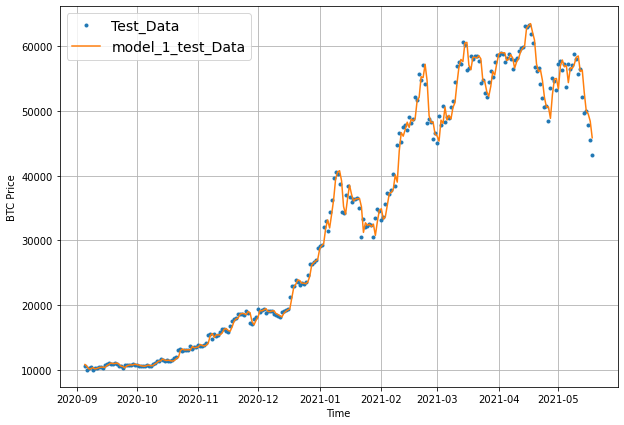

In [ ]:
# Let's plot model_1 predictions 
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,],start = offset,label = "Test_Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values = model_1_preds,start = offset,label = "model_1_test_Data",format="-")



```
# This is formatted as code
```

## Model 2 (window size = 30, horizon = 1)

In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # next one day
WINDOW_SIZE = 30 # Use 30 days of data

In [ ]:
full_windows_30,full_labels_30 = make_windows(prices,window_size = WINDOW_SIZE,horizon=HORIZON)

len(full_windows_30),len(full_windows_30)

(2757, 2757)

In [ ]:
full_labels_30[1]

array([198.04883])

In [ ]:
train_windows, test_windows, train_labels,test_labels = make_train_test_splits(full_windows_30,full_labels_30)

In [ ]:
train_windows[1]

array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
       123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
       135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
       160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
       175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499])

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(HORIZON,activation = "linear"),

],name = "model_2_dense")
model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_2.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 50ms/step - loss: 1097.0397 - mae: 1097.0397 - mse: 4741506.0000 - val_loss: 3900.2532 - val_mae: 3900.2532 - val_mse: 32752726.0000
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.1875 - val_loss: 1587.0747 - val_mae: 1587.0748 - val_mse: 6817664.0000
Epoch 3/100
18/18 [==============================] - 1s 40ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0938 - val_loss: 1220.6887 - val_mae: 1220.6887 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 1s 39ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1571 - val_mae: 1160.1571 - val_mse: 3837504.5000
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 187.9680 - mae: 187.9680 - mse: 173777.0469 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.5000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss

In [ ]:
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")

In [ ]:
model_2.evaluate(x=test_windows,y=test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 608.9615 - mae: 608.9615 - mse: 1281438.8750


[608.9614868164062, 608.9614868164062, 1281438.875]

In [ ]:
model_2_preds = make_preds(model_2,test_windows)
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8946.987 , 8967.846 , 8820.251 , 8615.828 , 8485.796 , 8384.62  ,
       8307.779 , 8171.7837, 8217.465 , 7839.1475], dtype=float32)>

In [ ]:
# Evaluate 
model_2_results =  evaluate_preds(y_true = tf.squeeze(test_labels),y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693388,
 'mase': 1.0644706,
 'mse': 1281438.9,
 'rmse': 1132.0066}

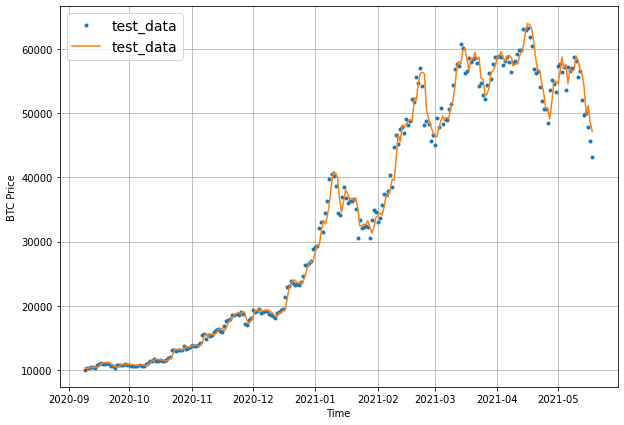

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,0],start = offset,label = "test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values = model_2_preds,start = offset,label = "test_data",format="-")

## Model 3 horzon : 7 window : 30

In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 7 # next one day
WINDOW_SIZE = 30 # Use 30 days of data

In [ ]:
full_windows,full_labels = make_windows(prices,WINDOW_SIZE,HORIZON)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)

In [ ]:
len(train_windows),len(test_windows)

(2200, 551)

In [ ]:
train_windows[1],test_labels[1]

(array([125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
        135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
        160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
        175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499]),
 array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102, 8656.97092235, 8500.64355816]))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(HORIZON,activation = "linear"),

],name = "model_3_dense")
model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_3.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 0,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

NameError: ignored

In [ ]:
model_3.evaluate(x = test_windows,y = test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1321.5200 - mae: 1321.5200 - mse: 5726831.5000


[1321.52001953125, 1321.52001953125, 5726831.5]

In [ ]:
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")

In [ ]:
model_3.evaluate(x = test_windows,y = test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1237.5063 - mae: 1237.5063 - mse: 5405198.5000


[1237.50634765625, 1237.50634765625, 5405198.5]

In [ ]:
model_3_preds = make_preds(model_3,test_windows)
model_3_preds[:10]

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[9004.693, 9048.1  , 9425.088, 9258.259, 9495.798, 9558.451,
        9357.353],
       [8735.507, 8840.304, 9247.793, 8885.6  , 9097.188, 9174.328,
        9156.819],
       [8672.508, 8782.388, 9123.855, 8770.372, 9007.13 , 9003.87 ,
        9042.723],
       [8874.398, 8784.737, 9043.901, 8943.051, 9033.479, 9176.488,
        9039.676],
       [8825.891, 8777.438, 8926.779, 8870.178, 9213.232, 9268.156,
        8942.485],
       [8797.742, 8840.091, 9027.693, 8974.781, 9149.175, 9229.459,
        8984.065],
       [8652.236, 8803.884, 9133.415, 8876.116, 8879.497, 9111.171,
        8917.192],
       [8435.782, 8533.1  , 8950.896, 8667.983, 8776.912, 8752.908,
        8673.28 ],
       [8423.753, 8317.123, 8790.314, 8533.364, 8648.61 , 8623.756,
        8503.702],
       [8550.176, 8408.629, 8685.884, 8591.831, 8562.819, 8604.392,
        8522.675]], dtype=float32)>

In [ ]:
test_labels[1]

array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
       8749.52059102, 8656.97092235, 8500.64355816])

In [ ]:
model_3_results =  evaluate_preds(y_true = tf.squeeze(test_labels),y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.60516 ,  355.08356 ,  327.17062 ,  358.50977 ,  420.53223 ,
         537.8537  ,  545.661   ,  485.92307 ,  584.49744 ,  687.3814  ,
         836.22675 ,  755.1571  ,  731.49567 ,  775.33954 ,  567.9549  ,
         266.80865 ,  188.80232 ,  188.10764 ,  253.09529 ,  301.43365 ,
         151.1075  ,  196.81432 ,  191.46184 ,  231.65067 ,  143.6114  ,
         122.59033 ,  132.78836 ,  190.81145 ,  179.15994 ,  228.25955 ,
         314.4401  ,  379.093   ,  278.32535 ,  295.34613 ,  299.3853  ,
         248.64977 ,  299.7565  ,  259.6938  ,  180.30559 ,  206.72873 ,
         374.6289  ,  144.85129 ,  142.33607 ,  131.1158  ,   93.9405  ,
          54.825893,   73.794365,  103.60003 ,  121.333916,  168.67244 ,
         183.9094  ,  152.25314 ,  186.57137 ,  146.91316 ,  240.42955 ,
         351.00662 ,  540.95154 ,  549.15674 ,  521.2422  ,  526.85516 ,
         453.36295 ,  257.9815  ,  277.29507 ,  301.82486 ,  455.71756 ,
         458.9597  ,  503.44412 ,  522.31195

In [ ]:
## Make our evaluation function work for larger horizon 
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true,dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  #Account for multidimensions
  if mae.ndim > 0 :
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}


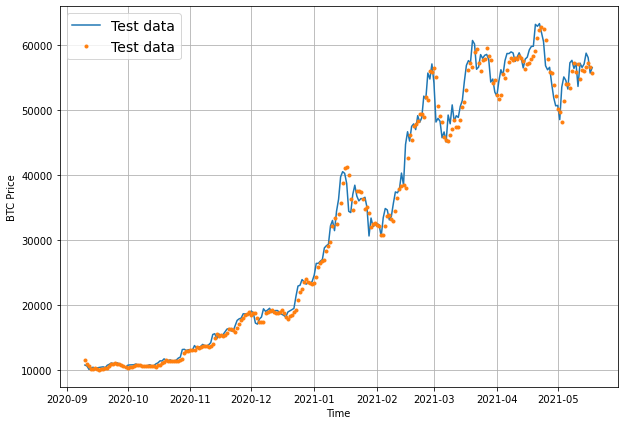

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,0],start = offset, label = "Test data",format = "-")
plot_time_series(timesteps=X_test[-len(test_windows):],values = model_3_preds[:,0],start = offset, label = "Test data")


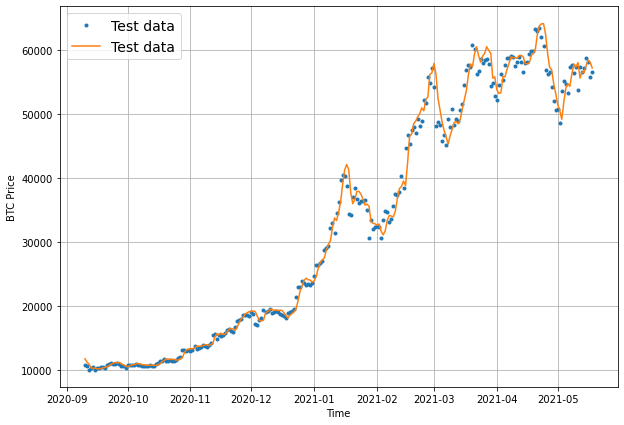

In [ ]:
offset = 300
plt.figure(figsize = (10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values = test_labels[:,0],start = offset, label = "Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values = tf.reduce_mean(model_3_preds,axis = 1),start = offset, label = "Test data",format = "-")


## Which of our models is performing the best sofar?



In [ ]:
import pandas as pd
pd.DataFrame({"naive": naive_results ["mae"],
              "horizon_1_window_7":model_1_results["mae"],
              "horizon_1_window30":model_2_results["mae"],"horizon_7_window30":model_3_results["mae"]},index = ["mae"]).plot(figsize = (10,7),kind = "bar")

ValueError: ignored

## Model 4 : Conv1D



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices,window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
# create train/test 
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(test_windows),len(test_labels)

(556, 556)

In [ ]:
full_labels[1]

array([124.049])

We need input shape of (batch_size, timesteps,input_dim)...
however, need to convert to this data shape


In [ ]:
# Check data input shape
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we need to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x:tf.expand_dims(x,axis = 1))# add extra dimension 

In [ ]:
# Test lambda layer
print(f"Original shape:{x.shape}")# WINDOW_SIZE
print(f"Expanded shape:{expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape:(7,)
Expanded shape:(7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
# Create Conv 1D
# lambda layer
# Conv1D model,filters = 128,kernel_size = ,padding
# ourput 

tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
                               layers.Lambda(lambda x : tf.expand_dims(x,axis = 1)),
                               layers.Conv1D(filters = 128,kernel_size = 5,strides = 1, padding = "causal", activation = "relu"),
                               layers.Dense(HORIZON)
],name = "model_4_conv1D")
model_4.compile(loss= "mae",
                optimizer = tf.keras.optimizers.Adam())
                #metrics = [])
model_4.fit(train_windows, train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 0,
            validation_data = (test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Evaluate
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1539


610.1538696289062

In [ ]:
# Load best model
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8283


570.8283081054688

In [ ]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.471, 8983.928, 8759.671, 8703.627, 8708.294,
       8661.668, 8494.84 , 8435.317, 8492.116], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)
model_4_results

{'mae': 570.82837,
 'mape': 2.5593357,
 'mase': 1.0027874,
 'mse': 1176671.2,
 'rmse': 1084.7448}

## Model 5 : RNN (LSTM)

In [ ]:
WINDOW_SIZE

7

In [ ]:
tf.random.set_seed(42)

# Let's use the functional API
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis = 1))(inputs)
#x = layers.LSTM(128,return_sequences = True)(x)
x = layers.LSTM(128,activation = "relu")(x)
#x = layers.Dense(32,activation = "relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs = inputs,outputs= output,name = "model_5_LSTM")

model_5.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())
model_5.fit(train_windows, train_labels,epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2342.5518INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 8s 314ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 741.1183 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 163ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 239.4237INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 183.6423INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 181.9180 - val_loss: 966.6430
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 172.5681INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 169ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
15/18 [========================>.....] - ETA: 0s - loss: 176.5974INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 157.6712 - val_loss: 914.8641
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 166.5143 - val_loss: 1079.0775
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 160.6682INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 162.3369 - val_loss: 877.1689
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 9ms/step - loss: 166.4727 - val_loss: 934.8435
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 163.9537 - val_loss: 920.2159
Epoch 15/100
15/18 [========================>.....] - ETA: 0s - loss: 155.2641INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 9ms/step - loss: 147.4420 - val_loss: 898.9912
Epoch 17/100
18/18 [==============================] - 0s 9ms/step - loss: 151.0533 - val_loss: 943.1415
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 157.8232 - val_loss: 924.0045
Epoch 19/100
18/18 [==============================] - 0s 10ms/step - loss: 155.9198 - val_loss: 911.4751
Epoch 20/100
18/18 [==============================] - 0s 10ms/step - loss: 155.6456 - val_loss: 862.6679
Epoch 21/100
18/18 [==============================] - 0s 9ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 10ms/step - loss: 151.4883 - val_loss: 863.8171
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 150.7770 - val_loss: 886.8352
Epoch 24/100
18/18 [==============================] - 0s 9ms/step - los

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 169ms/step - loss: 146.8467 - val_loss: 845.2780
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 146.8793INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
14/18 [======================>.......] - ETA: 0s - loss: 145.9703INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 144.4289 - val_loss: 804.3278
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 141.4923INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 169ms/step - loss: 142.4610 - val_loss: 789.0858
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 141.8738 - val_loss: 806.6756
Epoch 30/100
18/18 [==============================] - 0s 9ms/step - loss: 142.0521 - val_loss: 794.8835
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 138.2679INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 138.4690 - val_loss: 773.2811
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 138.0486INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 10ms/step - loss: 135.9342 - val_loss: 786.4801
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 136.0515INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 10ms/step - loss: 133.4514 - val_loss: 756.2968
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 133.3179INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 167ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 130.6932 - val_loss: 745.9096
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 130.9566INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 9ms/step - loss: 129.6088 - val_loss: 719.0669
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 129.6111 - val_loss: 732.0630
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 128.9929INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 123.2224INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 125.6113 - val_loss: 700.8699
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 125.9959 - val_loss: 704.3680
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 125.2335 - val_loss: 705.7668
Epoch 45/100
15/18 [========================>.....] - ETA: 0s - loss: 119.8296INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 169ms/step - loss: 123.0622 - val_loss: 683.1478
Epoch 46/100
16/18 [=========================>....] - ETA: 0s - loss: 125.3719INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 124.4731 - val_loss: 678.8002
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 122.3216 - val_loss: 704.1320
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 122.9185INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 122.1971 - val_loss: 677.0723
Epoch 49/100
18/18 [==============================] - 0s 10ms/step - loss: 121.4115 - val_loss: 686.2197
Epoch 50/100
18/18 [==============================] - 0s 10ms/step - loss: 124.1717 - val_loss: 699.5930
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 123.1637 - val_loss: 768.5488
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 125.4125INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 167ms/step - loss: 122.8096 - val_loss: 656.3328
Epoch 53/100
16/18 [=========================>....] - ETA: 0s - loss: 119.6989INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 119.6637 - val_loss: 653.5011
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 119.8910 - val_loss: 657.3867
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 122.3476INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 119.2047 - val_loss: 652.8461
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 119.9992INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 168ms/step - loss: 119.3205 - val_loss: 648.0640
Epoch 57/100
18/18 [==============================] - 0s 11ms/step - loss: 124.2525 - val_loss: 678.9784
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 119.1787INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 118.7968 - val_loss: 640.4487
Epoch 59/100
18/18 [==============================] - 0s 10ms/step - loss: 117.9080 - val_loss: 647.7901
Epoch 60/100
18/18 [==============================] - 0s 10ms/step - loss: 118.6574 - val_loss: 641.3154
Epoch 61/100
18/18 [==============================] - 0s 10ms/step - loss: 118.7184 - val_loss: 692.7327
Epoch 62/100
18/18 [==============================] - 0s 9ms/step - loss: 121.8047 - val_loss: 746.7704
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 122.9867 - val_loss: 653.1655
Epoch 64/100
18/18 [==============================] - 0s 10ms/step - loss: 116.6307 - val_loss: 691.8852
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 119.6754INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 151ms/step - loss: 119.9012 - val_loss: 632.4734
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 116.8929 - val_loss: 640.8807
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7600INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 149ms/step - loss: 117.5253 - val_loss: 627.0925
Epoch 68/100
18/18 [==============================] - 0s 11ms/step - loss: 115.7987 - val_loss: 634.7205
Epoch 69/100
16/18 [=========================>....] - ETA: 0s - loss: 120.4172INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 173ms/step - loss: 121.1620 - val_loss: 626.0740
Epoch 70/100
14/18 [======================>.......] - ETA: 0s - loss: 114.3003INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 114.5406 - val_loss: 619.9149
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 114.8007 - val_loss: 644.0363
Epoch 72/100
18/18 [==============================] - 0s 10ms/step - loss: 118.0182 - val_loss: 622.2191
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2479 - val_loss: 625.4630
Epoch 74/100
18/18 [==============================] - 0s 10ms/step - loss: 114.8512 - val_loss: 620.5396
Epoch 75/100
18/18 [==============================] - 0s 10ms/step - loss: 115.3828 - val_loss: 642.5835
Epoch 76/100
16/18 [=========================>....] - ETA: 0s - loss: 115.2777INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 150ms/step - loss: 114.3443 - val_loss: 613.7814
Epoch 77/100
18/18 [==============================] - 0s 9ms/step - loss: 115.7022 - val_loss: 695.9315
Epoch 78/100
18/18 [==============================] - 0s 10ms/step - loss: 117.6932 - val_loss: 633.0776
Epoch 79/100
15/18 [========================>.....] - ETA: 0s - loss: 113.5121INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 113.9945 - val_loss: 610.2693
Epoch 80/100
18/18 [==============================] - 0s 10ms/step - loss: 112.9416 - val_loss: 619.2508
Epoch 81/100
18/18 [==============================] - 0s 9ms/step - loss: 113.4932 - val_loss: 633.6910
Epoch 82/100
14/18 [======================>.......] - ETA: 0s - loss: 118.2065INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 165ms/step - loss: 115.7557 - val_loss: 607.1964
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 114.0791 - val_loss: 622.8551
Epoch 84/100
18/18 [==============================] - 0s 10ms/step - loss: 113.5459 - val_loss: 616.7029
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 113.2233 - val_loss: 635.4244
Epoch 86/100
18/18 [==============================] - 0s 10ms/step - loss: 115.0602 - val_loss: 613.9280
Epoch 87/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3023 - val_loss: 610.3387
Epoch 88/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8925INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 112.0842 - val_loss: 602.2922
Epoch 89/100
18/18 [==============================] - 0s 10ms/step - loss: 112.4245 - val_loss: 638.1335
Epoch 90/100
18/18 [==============================] - 0s 10ms/step - loss: 117.7214 - val_loss: 640.0769
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 116.0491 - val_loss: 648.4272
Epoch 92/100
18/18 [==============================] - 0s 10ms/step - loss: 113.3202 - val_loss: 608.7310
Epoch 93/100
16/18 [=========================>....] - ETA: 0s - loss: 113.4941INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 112.7520 - val_loss: 599.7028
Epoch 94/100
18/18 [==============================] - 0s 9ms/step - loss: 111.3058 - val_loss: 604.8187
Epoch 95/100
16/18 [=========================>....] - ETA: 0s - loss: 109.5947INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 164ms/step - loss: 111.2071 - val_loss: 597.4318
Epoch 96/100
18/18 [==============================] - 0s 10ms/step - loss: 112.0288 - val_loss: 606.4468
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 111.3928 - val_loss: 618.6616
Epoch 98/100
18/18 [==============================] - 0s 10ms/step - loss: 111.7728 - val_loss: 598.3398
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 110.1573INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 110.8527 - val_loss: 594.9131
Epoch 100/100
18/18 [==============================] - 0s 11ms/step - loss: 116.5293 - val_loss: 636.4102


In [ ]:
model_5=tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 594.9131


594.9130859375

In [ ]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8976.39 , 8808.528, 8994.173, 8832.938, 8727.634], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 594.9131,
 'mape': 2.6726766,
 'mase': 1.0450975,
 'mse': 1268392.6,
 'rmse': 1126.2294}

## Make a multivariate time series 

Before adding feature to time series, what is a feature we can use?

One features we could add the bitcoin halfing event as a feature 

In [ ]:
#let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
block_reward_1 = 50 # 3 January 2009
block_reward_2 = 25 # 8 Nov 2012
block_reward_3 = 12.5
block_reward_4 = 6.25 

# block_reward date
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")



In [ ]:
# Create date ranges of where specific block_rewards values 
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [ ]:
# Add in block_reward values as a feature to our dateframe
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4


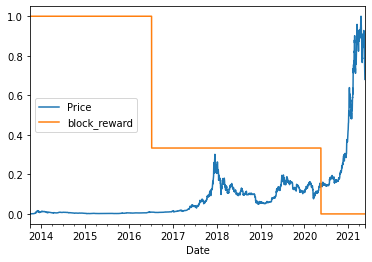

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),columns = bitcoin_prices_block.columns,index = bitcoin_prices_block.index)
scaled_price_block_df.plot()

## Making a windows dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper function

use pandas.DataFrame.shift()

In [ ]:
# Setup dataset hyperparameters 
HORIZON = 1
WINDOW_SIZE = 7 

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods = i +1)
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


What we've done is created a way to window our dataset directly from a pandas dataframe.

[0,1,2,3,4,5,6, block_reward]->[7]

In [ ]:
# Create X (windows) and y (horizon) features 
X = bitcoin_prices_windowed.dropna().drop("Price",axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing

split_size = int(len(X)*0.8)
X_train,y_train = X[:split_size], y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(HORIZON,activation = "linear"),
],name = "model_6_dense_multivariate")
model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (X_test, y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1391.9371 - mae: 1391.9371 - mse: 6081305.0000 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 52ms/step - loss: 1234.6805 - mae: 1234.6805 - mse: 5282006.0000 - val_loss: 2061.9080 - val_mae: 2061.9080 - val_mse: 11377611.0000
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 374.8489 - mae: 374.8489 - mse: 557252.9375INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 351.5053 - mae: 351.5053 - mse: 499358.0938 - val_loss: 1908.6729 - val_mae: 1908.6729 - val_mse: 8719439.0000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 239.8200 - mae: 239.8200 - mse: 278360.0312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 235.4153 - mae: 235.4153 - mse: 276006.7812 - val_loss: 1329.0585 - val_mae: 1329.0585 - val_mse: 4991872.0000
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 208.6022 - mae: 208.6022 - mse: 221509.3438INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 208.6112 - mae: 208.6112 - mse: 219502.7188 - val_loss: 1102.1340 - val_mae: 1102.1340 - val_mse: 3934655.0000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 196.5770 - mae: 196.5770 - mse: 204309.3594 - val_loss: 1107.8472 - val_mae: 1107.8472 - val_mse: 3822058.5000
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 186.0619 - mae: 186.0619 - mse: 177071.2969INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 61ms/step - loss: 187.2244 - mae: 187.2244 - mse: 185754.2188 - val_loss: 1036.1722 - val_mae: 1036.1722 - val_mse: 3602707.0000
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 189.6361 - mae: 189.6361 - mse: 195529.6406INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 182.0245 - mae: 182.0245 - mse: 177482.7656 - val_loss: 1019.2924 - val_mae: 1019.2924 - val_mse: 3334209.0000
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 172.0897 - mae: 172.0897 - mse: 158229.5625INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 175.7059 - mae: 175.7059 - mse: 166085.1875 - val_loss: 977.8487 - val_mae: 977.8487 - val_mse: 3114359.5000
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 173.7910 - mae: 173.7910 - mse: 165005.7812INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 170.1784 - mae: 170.1784 - mse: 157932.0000 - val_loss: 954.4034 - val_mae: 954.4034 - val_mse: 2930253.0000
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 160.5153 - mae: 160.5153 - mse: 140624.0938INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 164.4430 - mae: 164.4430 - mse: 149624.9219 - val_loss: 913.5146 - val_mae: 913.5146 - val_mse: 2725003.0000
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 157.0967 - mae: 157.0967 - mse: 136629.2500INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 158.6892 - mae: 158.6892 - mse: 137497.7188 - val_loss: 874.2504 - val_mae: 874.2504 - val_mse: 2503843.0000
Epoch 12/100
16/18 [=========================>....] - ETA: 0s - loss: 151.8416 - mae: 151.8416 - mse: 127497.5234INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 152.0732 - mae: 152.0732 - mse: 128314.8203 - val_loss: 861.0414 - val_mae: 861.0415 - val_mse: 2380360.2500
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 151.1057 - mae: 151.1057 - mse: 126204.9219 - val_loss: 886.1201 - val_mae: 886.1201 - val_mse: 2378218.5000
Epoch 14/100
16/18 [=========================>....] - ETA: 0s - loss: 144.4726 - mae: 144.4726 - mse: 114213.7734INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 147.5482 - mae: 147.5482 - mse: 118020.3750 - val_loss: 837.8613 - val_mae: 837.8613 - val_mse: 2199053.2500
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 144.6200 - mae: 144.6200 - mse: 117535.3672INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 142.3497 - mae: 142.3497 - mse: 113289.0000 - val_loss: 794.4784 - val_mae: 794.4784 - val_mse: 2039429.2500
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 135.8323 - mae: 135.8323 - mse: 103120.1719INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 137.5206 - mae: 137.5206 - mse: 106858.8906 - val_loss: 778.4048 - val_mae: 778.4048 - val_mse: 1954906.7500
Epoch 17/100
15/18 [========================>.....] - ETA: 0s - loss: 132.5314 - mae: 132.5314 - mse: 98830.5312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 135.8191 - mae: 135.8191 - mse: 104154.0312 - val_loss: 772.4528 - val_mae: 772.4528 - val_mse: 1901519.8750
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 138.6812 - mae: 138.6812 - mse: 108255.5781INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 134.8562 - mae: 134.8562 - mse: 102955.3906 - val_loss: 747.4800 - val_mae: 747.4800 - val_mse: 1804913.1250
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 130.3347 - mae: 130.3347 - mse: 96741.8438 - val_loss: 761.0549 - val_mae: 761.0549 - val_mse: 1809535.3750
Epoch 20/100
15/18 [========================>.....] - ETA: 0s - loss: 129.3624 - mae: 129.3624 - mse: 94928.0859 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 128.6775 - mae: 128.6775 - mse: 93855.6875 - val_loss: 701.8977 - val_mae: 701.8977 - val_mse: 1664375.5000
Epoch 21/100
14/18 [======================>.......] - ETA: 0s - loss: 129.3930 - mae: 129.3930 - mse: 92329.5547 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 129.5576 - mae: 129.5576 - mse: 95792.1172 - val_loss: 691.0128 - val_mae: 691.0128 - val_mse: 1604253.5000
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 126.2893 - mae: 126.2893 - mse: 91620.9531 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 125.8060 - mae: 125.8060 - mse: 90966.0859 - val_loss: 684.4119 - val_mae: 684.4119 - val_mse: 1561598.8750
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 125.5263 - mae: 125.5263 - mse: 90267.1406 - val_loss: 692.1294 - val_mae: 692.1294 - val_mse: 1560175.6250
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 123.9486 - mae: 123.9486 - mse: 90016.2656INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 122.4765 - mae: 122.4765 - mse: 86726.8125 - val_loss: 674.2213 - val_mae: 674.2213 - val_mse: 1504522.0000
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 123.2996 - mae: 123.2996 - mse: 84829.4219INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 121.1171 - mae: 121.1171 - mse: 84265.1719 - val_loss: 669.6445 - val_mae: 669.6445 - val_mse: 1546641.5000
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - mae: 127.2623 - mse: 87325.4297 - val_loss: 690.0408 - val_mae: 690.0408 - val_mse: 1606597.0000
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 126.7325 - mae: 126.7325 - mse: 88919.9062 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 124.6204 - mae: 124.6204 - mse: 87496.1484 - val_loss: 643.9725 - val_mae: 643.9725 - val_mse: 1437325.8750
Epoch 28/100
18/18 [==============================] - 0s 6ms/step - loss: 118.2544 - mae: 118.2544 - mse: 81311.5938 - val_loss: 656.2766 - val_mae: 656.2766 - val_mse: 1431099.1250
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 122.4419 - mae: 122.4419 - mse: 88712.9688INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 119.6374 - mae: 119.6374 - mse: 82266.8672 - val_loss: 633.4545 - val_mae: 633.4545 - val_mse: 1375091.3750
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 120.1284 - mae: 120.1284 - mse: 82337.5312INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 119.5001 - mae: 119.5001 - mse: 81478.4141 - val_loss: 625.3953 - val_mae: 625.3953 - val_mse: 1360550.1250
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5633 - mae: 114.5633 - mse: 78351.5234 - val_loss: 668.5061 - val_mae: 668.5061 - val_mse: 1448342.7500
Epoch 32/100
15/18 [========================>.....] - ETA: 0s - loss: 117.7110 - mae: 117.7110 - mse: 80543.2422INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 116.9750 - mae: 116.9750 - mse: 80914.8672 - val_loss: 617.1060 - val_mae: 617.1060 - val_mse: 1328562.1250
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 115.2438 - mae: 115.2438 - mse: 78368.8203 - val_loss: 649.0985 - val_mae: 649.0985 - val_mse: 1390662.8750
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 114.5187 - mae: 114.5187 - mse: 78831.3672 - val_loss: 632.1378 - val_mae: 632.1378 - val_mse: 1383322.2500
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 117.1253 - mae: 117.1253 - mse: 82290.1406INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 61ms/step - loss: 113.6357 - mae: 113.6357 - mse: 76610.7734 - val_loss: 607.4173 - val_mae: 607.4173 - val_mse: 1299839.2500
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2605 - mae: 115.2605 - mse: 77254.8281 - val_loss: 626.4316 - val_mae: 626.4316 - val_mse: 1328737.6250
Epoch 37/100
15/18 [========================>.....] - ETA: 0s - loss: 116.2274 - mae: 116.2274 - mse: 79238.8203 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 44ms/step - loss: 113.7021 - mae: 113.7021 - mse: 76909.3281 - val_loss: 606.2318 - val_mae: 606.2318 - val_mse: 1299942.2500
Epoch 38/100
15/18 [========================>.....] - ETA: 0s - loss: 112.6514 - mae: 112.6514 - mse: 77077.6484INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 111.4061 - mae: 111.4061 - mse: 75382.8828 - val_loss: 603.2919 - val_mae: 603.2919 - val_mse: 1290358.7500
Epoch 39/100
15/18 [========================>.....] - ETA: 0s - loss: 115.8051 - mae: 115.8051 - mse: 79959.0391 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 112.7722 - mae: 112.7722 - mse: 75144.9141 - val_loss: 596.0060 - val_mae: 596.0060 - val_mse: 1267988.8750
Epoch 40/100
16/18 [=========================>....] - ETA: 0s - loss: 110.6383 - mae: 110.6383 - mse: 75099.1172INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 110.5418 - mae: 110.5418 - mse: 73266.8828 - val_loss: 593.2170 - val_mae: 593.2170 - val_mse: 1259325.8750
Epoch 41/100
18/18 [==============================] - 0s 6ms/step - loss: 110.8671 - mae: 110.8671 - mse: 73493.2500 - val_loss: 609.1066 - val_mae: 609.1066 - val_mse: 1298277.7500
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 115.7249 - mae: 115.7249 - mse: 78316.4297 - val_loss: 607.4875 - val_mae: 607.4875 - val_mse: 1271582.6250
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 111.3313 - mae: 111.3313 - mse: 72553.7578 - val_loss: 606.2031 - val_mae: 606.2031 - val_mse: 1287465.1250
Epoch 44/100
15/18 [========================>.....] - ETA: 0s - loss: 108.7434 - mae: 108.7434 - mse: 71892.2578INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 109.7027 - mae: 109.7027 - mse: 72483.3594 - val_loss: 586.1214 - val_mae: 586.1214 - val_mse: 1236946.3750
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8748 - mae: 107.8748 - mse: 72189.4922 - val_loss: 593.8447 - val_mae: 593.8447 - val_mse: 1256011.3750
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8641 - mae: 109.8641 - mse: 72053.3047 - val_loss: 586.4578 - val_mae: 586.4578 - val_mse: 1224364.2500
Epoch 47/100
18/18 [==============================] - 0s 6ms/step - loss: 112.3587 - mae: 112.3587 - mse: 74881.6562 - val_loss: 655.4485 - val_mae: 655.4485 - val_mse: 1368205.5000
Epoch 48/100
18/18 [==============================] - 0s 7ms/step - loss: 109.1614 - mae: 109.1614 - mse: 72981.2422 - val_loss: 598.7232 - val_mae: 598.7232 - val_mse: 1244141.5000
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 109.3029 - mae: 109.3029 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 110.4069 - mae: 110.4069 - mse: 73627.0469 - val_loss: 575.7751 - val_mae: 575.7751 - val_mse: 1197730.7500
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6609 - mae: 108.6609 - mse: 71261.1094 - val_loss: 785.9759 - val_mae: 785.9759 - val_mse: 1798980.7500
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 124.9824 - mae: 124.9824 - mse: 82843.3594 - val_loss: 670.3788 - val_mae: 670.3788 - val_mse: 1435155.3750
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 112.8591 - mae: 112.8591 - mse: 71915.3984 - val_loss: 580.2875 - val_mae: 580.2875 - val_mse: 1201587.5000
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 107.2513 - mae: 107.2513 - mse: 70587.5156 - val_loss: 597.5087 - val_mae: 597.5087 - val_mse: 1251076.3750
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2322 - mae: 109.2322 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 112.0475 - mae: 112.0475 - mse: 73420.1875 - val_loss: 575.5543 - val_mae: 575.5543 - val_mse: 1191944.0000
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2830 - mae: 111.2830 - mse: 71301.0156 - val_loss: 590.7806 - val_mae: 590.7806 - val_mse: 1225397.6250
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7917 - mae: 106.7917 - mse: 69382.4531 - val_loss: 586.8845 - val_mae: 586.8845 - val_mse: 1218028.8750
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2987 - mae: 112.2987 - mse: 70631.5547 - val_loss: 696.5294 - val_mae: 696.5294 - val_mse: 1492197.5000
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 124.7808 - mae: 124.7808 - mse: 81109.6094 - val_loss: 698.5267 - val_mae: 698.5267 - val_mse: 1498613.5000
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3443 - mae: 119.3443 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 41ms/step - loss: 106.7710 - mae: 106.7710 - mse: 70055.2344 - val_loss: 573.6144 - val_mae: 573.6144 - val_mse: 1185168.6250
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2485 - mae: 110.2485 - mse: 71589.1719 - val_loss: 618.8955 - val_mae: 618.8955 - val_mse: 1289603.2500
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5330 - mae: 105.5330 - mse: 69883.3125 - val_loss: 574.9454 - val_mae: 574.9454 - val_mse: 1189283.0000
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3177 - mae: 107.3177 - mse: 69894.7578 - val_loss: 606.1973 - val_mae: 606.1973 - val_mse: 1240846.7500
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8084 - mae: 107.8084 - mse: 70983.0859 - val_loss: 582.2406 - val_mae: 582.2406 - val_mse: 1206272.2500
Epoch 77/100
14/18 [======================>.......] - ETA: 0s - loss: 111.0995 - mae: 111.0995 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 107.2528 - mae: 107.2528 - mse: 69628.3281 - val_loss: 571.8563 - val_mae: 571.8563 - val_mse: 1180512.1250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 106.2309 - mae: 106.2309 - mse: 69009.0156 - val_loss: 572.2827 - val_mae: 572.2827 - val_mse: 1174658.6250
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 105.8568 - mae: 105.8568 - mse: 70072.8281 - val_loss: 596.5464 - val_mae: 596.5464 - val_mse: 1236696.6250
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8419 - mae: 107.8419 - mse: 70822.2734 - val_loss: 577.2399 - val_mae: 577.2399 - val_mse: 1181262.8750
Epoch 81/100
11/18 [=================>............] - ETA: 0s - loss: 104.6388 - mae: 104.6388 - mse: 70595.7188INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 105.1101 - mae: 105.1101 - mse: 68809.2422 - val_loss: 568.4897 - val_mae: 568.4897 - val_mse: 1169004.1250
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 114.1867 - mae: 114.1867 - mse: 75576.8359 - val_loss: 592.5613 - val_mae: 592.5613 - val_mse: 1228615.8750
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 107.9631 - mae: 107.9631 - mse: 70494.3125 - val_loss: 651.6219 - val_mae: 651.6219 - val_mse: 1362899.7500
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6690 - mae: 109.6690 - mse: 71213.1797 - val_loss: 568.9339 - val_mae: 568.9339 - val_mse: 1170231.2500
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8219 - mae: 105.8219 - mse: 69465.6016 - val_loss: 571.5331 - val_mae: 571.5331 - val_mse: 1169861.5000
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 104.8628 - mae: 104.8628 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 104.2910 - mae: 104.2910 - mse: 67384.7266 - val_loss: 568.2687 - val_mae: 568.2687 - val_mse: 1165598.0000
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 106.5346 - mae: 106.5346 - mse: 68593.1641 - val_loss: 606.5489 - val_mae: 606.5489 - val_mse: 1257387.5000
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1290 - mae: 107.1290 - mse: 70196.0000 - val_loss: 585.3787 - val_mae: 585.3787 - val_mse: 1193016.0000
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8151 - mae: 105.8151 - mse: 68698.7969 - val_loss: 574.4833 - val_mae: 574.4833 - val_mse: 1186979.0000
Epoch 99/100
15/18 [========================>.....] - ETA: 0s - loss: 104.1210 - mae: 104.1210 - mse: 66679.7188 INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 42ms/step - loss: 105.8276 - mae: 105.8276 - mse: 69450.7734 - val_loss: 567.5863 - val_mae: 567.5863 - val_mse: 1161687.2500
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9743 - mae: 114.9743 - mse: 71127.5078 - val_loss: 654.9892 - val_mae: 654.9892 - val_mse: 1347329.3750


In [ ]:
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 567.5862 - mae: 567.5862 - mse: 1161687.2500


[567.5862426757812, 567.5862426757812, 1161687.25]

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)
model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.99709195,
 'mse': 1161687.2,
 'rmse': 1077.816}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Model 7 : N-BEATS algorithm

* practice replicating a paper with TensorFlow 
* see how to use TensorFlow layer subclassing 
* Get experience using the Functional API



### Building and testing the N-BEATS block layer


Because the N_BEATS does not exist in tensorflow. need to create it 

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatBlock class



In [ ]:
# Set up dummy NBeatsBlock layer
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                      theta_size = WINDOW_SIZE+HORIZON,
                                      horizon = HORIZON,
                                      n_neurons = 128,
                                      n_layers = 4     )

In [ ]:
# Create dummy inputs(have to have same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1,axis = 0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy input to the block layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

print(f"backcast:{tf.squeeze(backcast.numpy())}")
print(f"forecast:{tf.squeeze(forecast.numpy())}")

backcast:[ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
forecast:-0.7554212808609009


## Preparing data for the N-BEATS algorithm using tf.data

Adhering to the data pipeline steps


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods= i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make the features and labels
X= bitcoin_prices_nbeats.dropna().drop("Price",axis = 1)
y = bitcoin_prices_nbeats.dropna()["Price"]

split_size = int(len(X)*0.8)
X_train,y_train= X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make the dataset performance using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))


# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset= test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters for N-BEATS algorithm

The N-Beats algorithm has a few number of parameters, from table 18


In [ ]:
# Values from N-BEATS

N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

### Getting ready for residual connections
 We need subtract and add two tensor

In [ ]:
# Make tensors 

tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

tensor_1,tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
subtracted = layers.subtract([tensor_1,tensor_2])
added = layers.add([tensor_1,tensor_2])

print(f"Input tensors:{tensor_1.numpy()}& {tensor_2.numpy()}")
added,subtracted

Input tensors:[10 11 12 13 14 15 16 17 18 19]& [0 1 2 3 4 5 6 7 8 9]


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>)

### building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer using 'NBeatsBlock'
2.Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model input and output together using tf.keras.Model()
8. compile the model with MAE loss (the paper uses multiple losses but we'll just use MAE and Adam optimizer with default setting 
9.Fit the N-BEATS model for 5000 epochs, use a couple of callbacks:

* early stopping 
* Reduce LR on Plateau- if a model stops improving, try lowering the learning to reduce the amount it update

In [ ]:
%%time
tf.random.set_seed(42)

#1. setup instance of NBeatsBlock 
nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = "InitialBlock")

#2. Create input to stack
stack_input = layers.Input(shape = (INPUT_SIZE),name = "stack_input")

#3. Create initial backcast and forecast 
residuals, forecast = nbeats_block_layer(stack_input)
# 4. Create stacks of blok layers
residuals = layers.subtract([residuals,stack_input],name = f"subtract_{-1}")
for i, _ in enumerate(range(N_STACKS -1)): # first stack created
  # 5. use the NBeatsblock to calculate the backcast the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f"NBeatsBlock_{i}"
  )(residuals)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals,backcast],name = f"subtract_{i}")
  forecast = layers.add([forecast,block_forecast],name = f"add_{i}")
#7. put together the stack model
model_7 = tf.keras.Model(inputs =stack_input,outputs = forecast,name = "model_7_NBEATS" )

model_7.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                )

#9
model_7.fit(train_dataset,
            epochs = N_EPOCHS,
            validation_data=test_dataset,
            verbose = 0,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                          patience = 200,
                                                          restore_best_weights = True),
                         tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",patience = 100,verbose = 1)])


Epoch 00268: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00368: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 32s, sys: 3.37 s, total: 2min 36s
Wall time: 3min 49s


In [ ]:
# Evaluate 
model_7.evaluate(test_dataset)


1/1 [==============================] - 0s 66ms/step - loss: 568.0906


568.090576171875

In [ ]:
# make predictions 
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8850.309 , 8794.7295, 9069.733 , 8786.514 , 8759.638 , 8820.537 ,
       8657.113 , 8511.244 , 8521.413 , 8533.913 ], dtype=float32)>

In [ ]:
# Evaluate model preds,
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 568.0906,
 'mape': 2.6403434,
 'mase': 0.9979778,
 'mse': 1124020.9,
 'rmse': 1060.1985}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

### Plotting the N-BEATS architecture we've created 

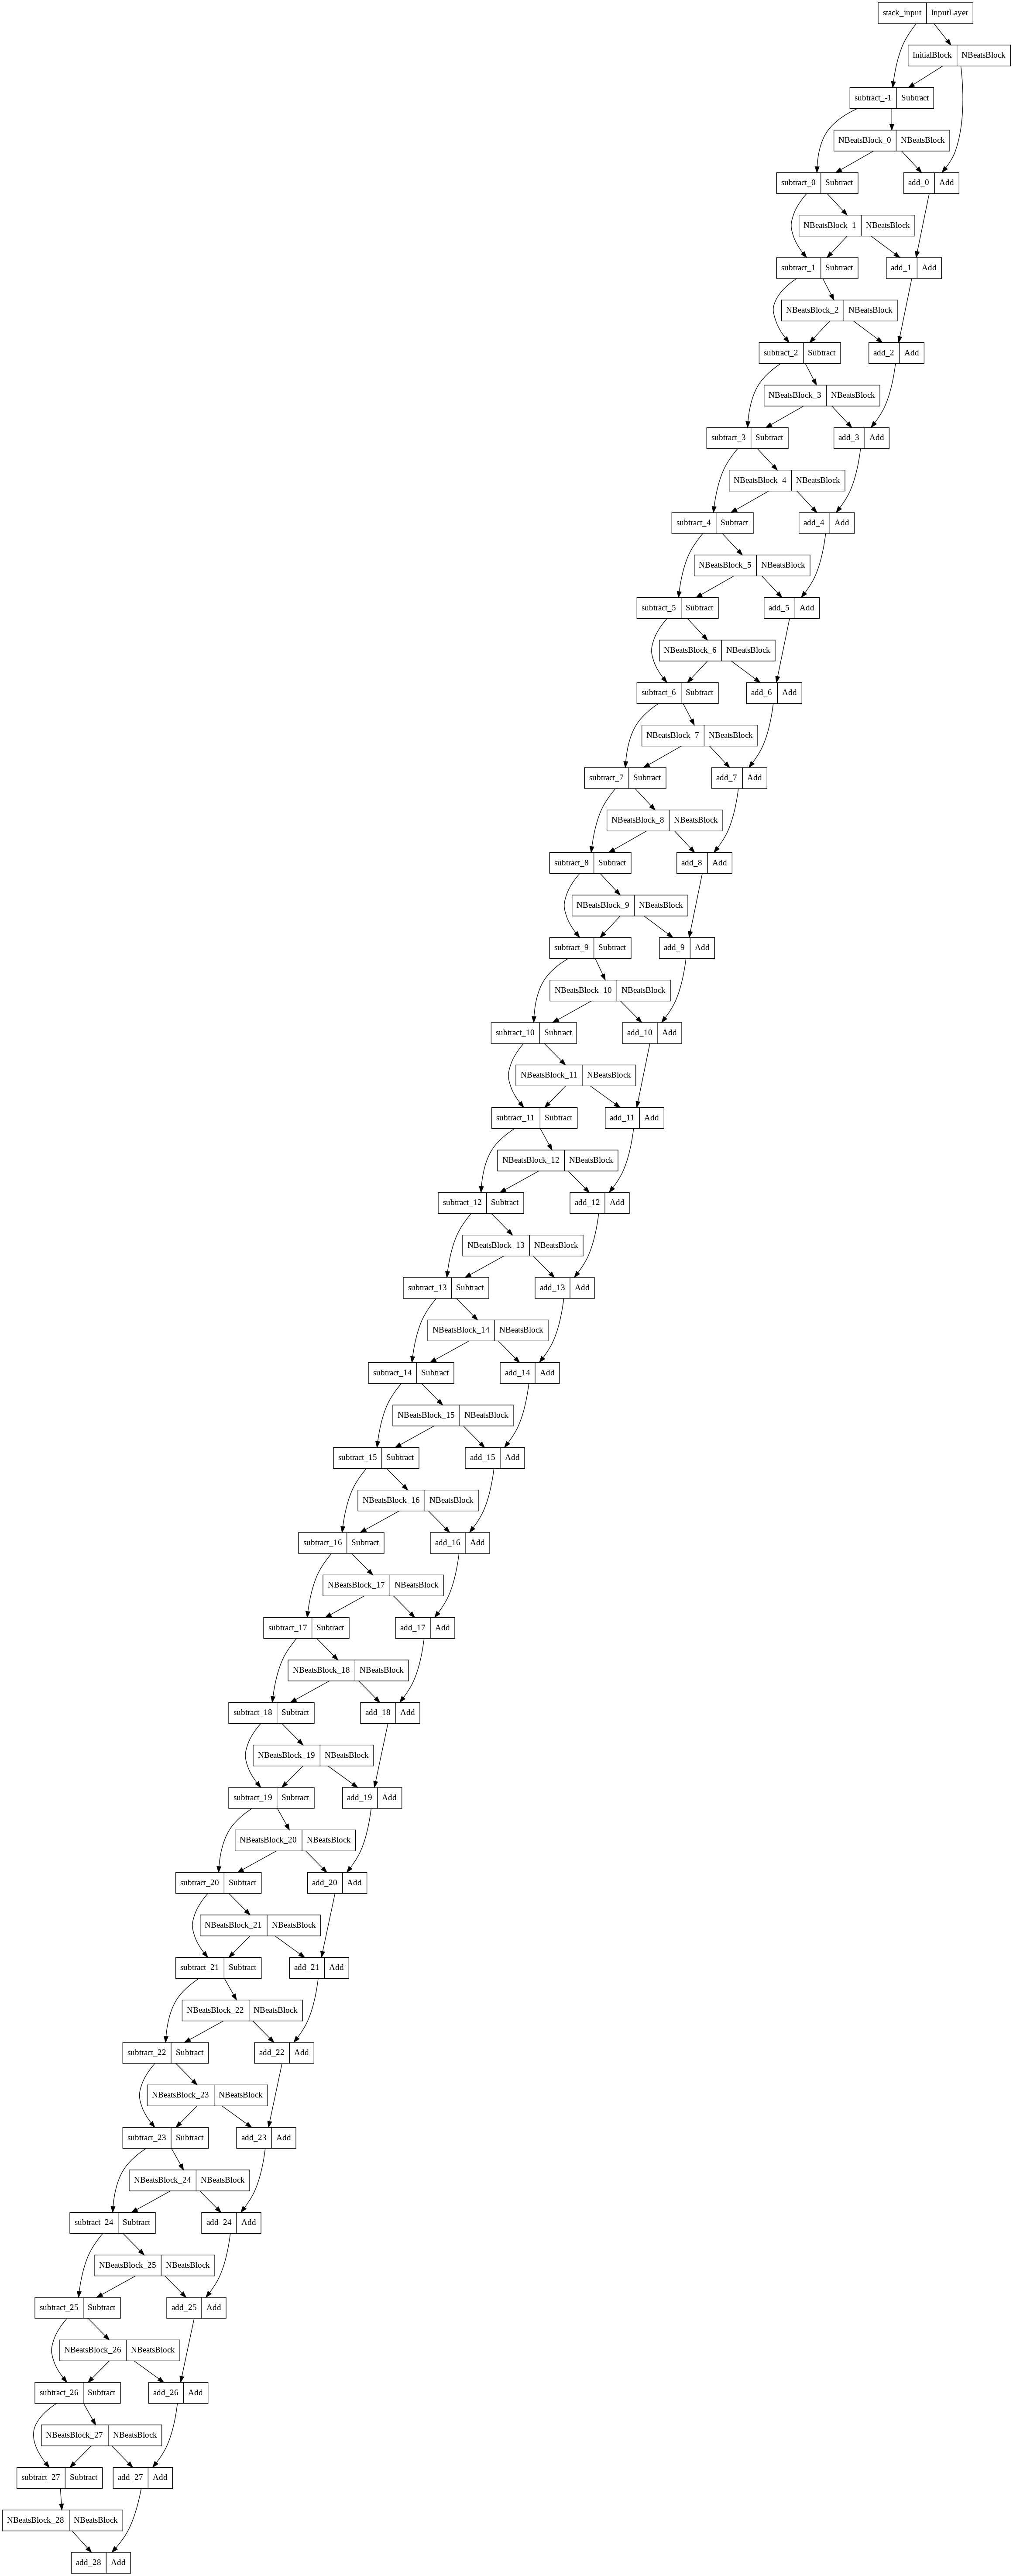

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models)

it combines many different models to predict a common goal


In [ ]:
HORIZON=1
WINDOW_SIZE=7

## Constructing and fitting and ensemble of models(using different loss functions)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fn = ["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE,MSE and MAPE loss
  For example, if num_iter = 30 , a list of 10 trained models will be returned
  10*["mae","mse","mape"]
  """
 # Make empty list for trained ensemble models
  ensemble_models = []
 # create num_iter number of models per loss function 
  for i in range(num_iter):
    for loss_function in loss_fn:
     print(f"Optimizing model by reducing :{loss_function} for {num_epochs} epochs,model number:{i}")
     model = tf.keras.Sequential([
                                  layers.Dense(128,kernel_initializer = "he_normal",activation = "relu"),
                                  layers.Dense(128,kernel_initializer = "he_normal",activation = "relu"),
                                  layers.Dense(HORIZON)
     ])
     # compile
     model.compile(loss = loss_function,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae","mse"])
     
     #Fit
     model.fit(train_data,
               epochs = num_epochs,
               verbose = 0,
               validation_data = test_data,
               callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                             patience =200,
                                                             restore_best_weights = True),
                            tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                 patience = 100,
                                                                 verbose = 1)]              )
     ensemble_models.append(model)
  return  ensemble_models

In [ ]:
%%time
# Get a list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing :mae for 1000 epochs,model number:0

Epoch 00263: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00649: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00749: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing :mse for 1000 epochs,model number:0

Epoch 00396: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00496: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing :mape for 1000 epochs,model number:0

Epoch 00240: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00354: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00454: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing :mae for 1000 epochs,model number:1
Optimizing model by reducing :mse for 1000 epochs,model number:1

Epoch 00623: Redu

In [ ]:
len(ensemble_models)

15

### Make predictions with ensemble model

In [ ]:
# Create a function that uses a list of model 
def make_ensemble_preds(ensemble_models,data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models, data = test_dataset)
ensemble_preds

CPU times: user 853 ms, sys: 44.1 ms, total: 897 ms
Wall time: 10 s


In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis = 0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8775.563 , 8770.91  , 9066.21  , 8710.136 , 8740.545 , 8729.641 ,
       8648.2705, 8479.235 , 8452.809 , 8523.149 ], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds,axis = 0)
ensemble_median[:5]

array([8789.136, 8765.044, 9058.518, 8714.298, 8745.346], dtype=float32)

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_true = y_test,y_pred = ensemble_mean)
ensemble_results

{'mae': 568.43555,
 'mape': 2.5626945,
 'mase': 0.9985838,
 'mse': 1151896.0,
 'rmse': 1073.2642}

### Plotting the prediction intevals (uncertainty estimates) of our ensemble

SO far we've been making point predictions with our models.

e.g. horizon = 1

would like to predict a range. 

To get the 95% confidence prediction intevals for deep learning model is the bootstrap mdthod:

1. take the predictions from a number of randomly initialized models
2. measure the standard deviateion of the predictions
3. Mltiply the standard deviation by 1.96(assuming the distribution is Gaussion /Normal
4. get the prediction interval upper and lower bounds, add and subtract the value obtianed in 3 to the mean/median of the prediction 

In [ ]:
# Find the upper and lower bounds of the ensemble predictions
def get_upper_low(preds):# 1. Take the preds from a number of randomly initialized 

# 2. measure the standard deviation 
  std = tf.math.reduce_std(ensemble_preds,axis = 0)
  #3. Multiply the sigma with 1.96
  interval = 1.96 * std
  #4. 
  preds_mean = tf.reduce_mean(preds,axis = 0)
  lower,upper = preds_mean - interval,preds_mean+interval 
  return lower , upper

In [ ]:
lower, upper = get_upper_low(preds = ensemble_preds)
lower[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8702.379, 8697.136, 9001.307, 8648.708], dtype=float32)>

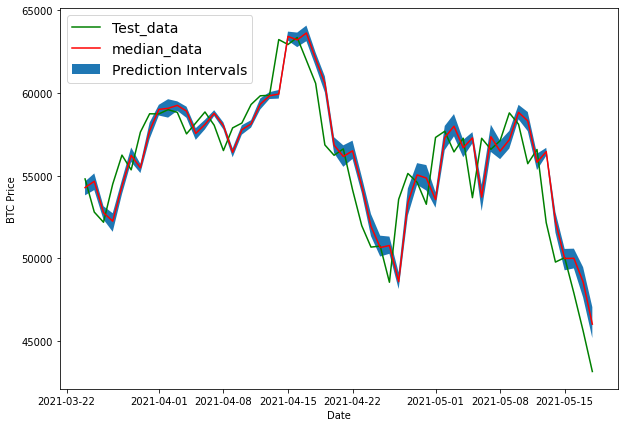

In [ ]:
# Get the median /mean of ensemble preds
ensemble_median = np.median(ensemble_preds,axis = 0)
# plot the median of ensemble preds along with the prediction intervals
offset =500
plt.figure(figsize = (10,7))
plt.plot(X_test.index[offset:],y_test[offset:],"g",label ="Test_data" )
plt.plot(X_test.index[offset:],ensemble_median[offset:],"r",label ="median_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# To plot the upper and lower bounds
plt.fill_between(X_test.index[offset:],(lower)[offset:],(upper)[offset:],label = "Prediction Intervals")
plt.legend(loc= "upper left",fontsize = 14)

## Model 9 : Train a model on the full historical data to make predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis = 1).to_numpy()

# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()
len(X_all),len(y_all)

(2780, 2780)

In [ ]:
# turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

# Batch and prefetch for optimial performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [ ]:
tf.random.set_seed(42)

# Create model
model_9 = tf.keras.Sequential([
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(128,activation = "relu"),
                               layers.Dense(HORIZON)
])
model_9.compile(loss =tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam())
model_9.fit(dataset_all,
            epochs = 100,
            verbose = 0)

### Make predictions into feature

In [ ]:
# How many timestep to predict into the future
INTO_FUTURE = 14

To make predict
1. Takes as input:
* a list of values (Bitcoin historical data)
* a trained model (such as `model_9`)
* a window into the future to predict
* the window size a model was trained on (`WINDOW_SIZE`), the model can only predict on the same kind of data it was trained on 
2. Creates an empty list for future forecasts (this will be returned at the end of the end, when it's full of predictions) and extracts the last`WINDOW_SIZE` values from the input values
3. loop`INTO_FUTURE` times making a prediction on window size sequences which update to remove the first value and append it to the input

In [ ]:
# 1. Create a function to make predictions in to the feature
def make_future_forecasts(values,model,into_future,window_size = WINDOW_SIZE)->list:
  """
  Make future forecasts into_future steps after values ends,
  Returns future forecasts as a list of floats
  """
  #2. Create an empty list for future forecasts/prepare data to forecast on 
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]
  #3. Make INTO_FUTURE number of predictions,altering the data 
  for _ in range(INTO_FUTURE):
    # predict on the last window then append it again 
    future_pred = model.predict(tf.expand_dims(last_window,axis = 0))
    print(f"Predicting on :\n {last_window}->Prediction:{tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())


    # update last window with new pred and get WINDOW_SIZE most recent preds(model was trained with )
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

In [ ]:
# Make future forecast
future_forecast = make_future_forecasts(values = y_all,
                                        model = model_9,
                                        into_future = INTO_FUTURE,
                                        window_size = WINDOW_SIZE)

Predicting on :
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]->Prediction:55764.46484375

Predicting on :
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375]->Prediction:50985.9453125

Predicting on :
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ]->Prediction:48522.96484375

Predicting on :
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375]->Prediction:48137.203125

Predicting on :
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ]->Prediction:47880.63671875

Predicting on :
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875]->Prediction:46879.71875

Predicting on :
 [43144.47129086 55764.46484375 50985.9453125  48522.96484375
 48137.2031

### Plot future forecast

In [ ]:
future_forecast

[55764.465,
 50985.945,
 48522.965,
 48137.203,
 47880.637,
 46879.72,
 48227.6,
 53963.69,
 49685.56,
 47596.176,
 48114.43,
 48808.008,
 48623.855,
 50178.723]

In [ ]:
def get_future_dates(start_date,into_future,offset = 1):
  """
  Returns array of datetime values ranging from start_data to start_date + into_future
  """
  start_date = start_date + np.timedelta64(offset,"D")# specify start date,"D" stands for day
  end_date = start_date + np.timedelta64(into_future,"D")# sepcify end date
  return np.arange(start_date,end_date,dtype = "datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
next_time_steps = get_future_dates(start_date = last_timestep,
                                   into_future = INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])

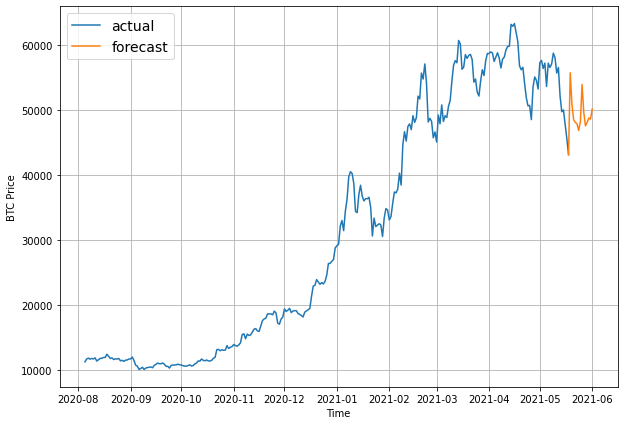

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(bitcoin_prices.index,btc_price,start = 2500,format = "-",label ="actual")
plot_time_series(next_time_steps,future_forecast,format = "-",label ="forecast")

## Model 10 : Evaluate how a anomaly would modify the evaluate of the performance of the model.


In [ ]:
# Let's introduce a turkey problem 
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1]= btc_price_turkey[-1]/100


In [ ]:
# Manufacture an extra price on the end(to showcase our Turkey problem)
btc_price[-10:],btc_price_turkey[-10:]

([58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  43144.4712908603],
 [58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  431.44471290860304])

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

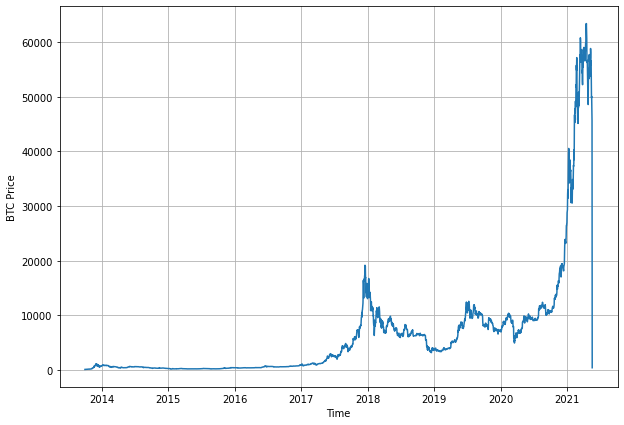

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(btc_timesteps_turkey,btc_price_turkey,format = "-",)

In [ ]:
# Create trian and test sets for kurkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey),window_size = WINDOW_SIZE,horizon = HORIZON)
X_train,X_test,y_train,y_test = make_train_test_splits(full_windows,full_labels)

In [ ]:
y_test[-1]

array([431.44471291])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               1024      
                                                                 
 dense_55 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_Turkey_Model"
turkey_model.compile(loss = "mae",
                     optimizer = tf.keras.optimizers.Adam())
turkey_model.fit(X_train,y_train,
                 epochs = 100,
                 verbose = 0,
                 batch_size = 128,
                 validation_data = (X_test,y_test),
                 callbacks = [create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:Assets written to: model_experiments/model_10_Turkey_Model/assets
INFO:tensorflow:

In [ ]:
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 752.1207


752.1207275390625

In [ ]:
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_Turkey_Model")

In [ ]:
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 4ms/step - loss: 646.1453


646.1453247070312

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model,X_test)
y_test[:10],turkey_preds[:10]

(array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102],
        [8656.97092235],
        [8500.64355816],
        [8469.2608989 ],
        [8537.33965197],
        [8205.80636599]]), <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8820.701, 8772.058, 8966.489, 8725.156, 8767.573, 8694.229,
        8612.936, 8552.284, 8418.921, 8493.336], dtype=float32)>)

In [ ]:
turkey_results = evaluate_preds(y_true = y_test,
                                y_pred = turkey_preds)
turkey_results

{'mae': 17124.049,
 'mape': 121.27008,
 'mase': 26.499521,
 'mse': 614059260.0,
 'rmse': 23703.531}

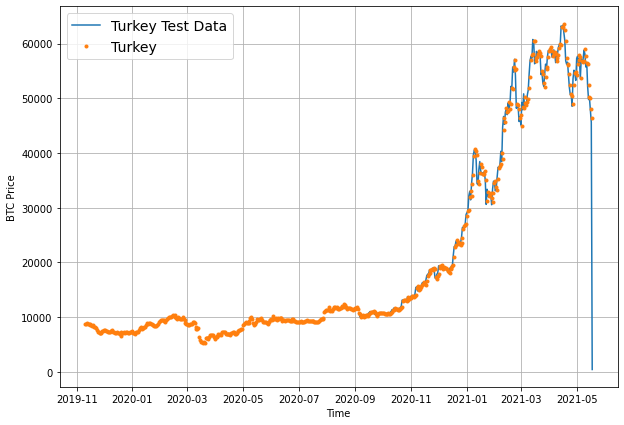

In [ ]:
plt.figure(figsize = (10,7))
offset = 300
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = btc_price_turkey[-len(y_test):],
                 format = "-",
                 label = "Turkey Test Data",start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_test):],
                 values = turkey_preds,
                 label = "Turkey")